In [3]:
import pandas as pd
import numpy as np


In [4]:
%config IPCompleter.greedy=True

In [45]:
terra_file = pd.read_csv('GlobalTemperatures.csv')

In [46]:
import matplotlib.pyplot as plt 
% matplotlib inline
plt.style.use('ggplot')

In [47]:
terra_file.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
terra_file = df.ix[:,:2]
terra_file.head(10)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [50]:
 
terra_file.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


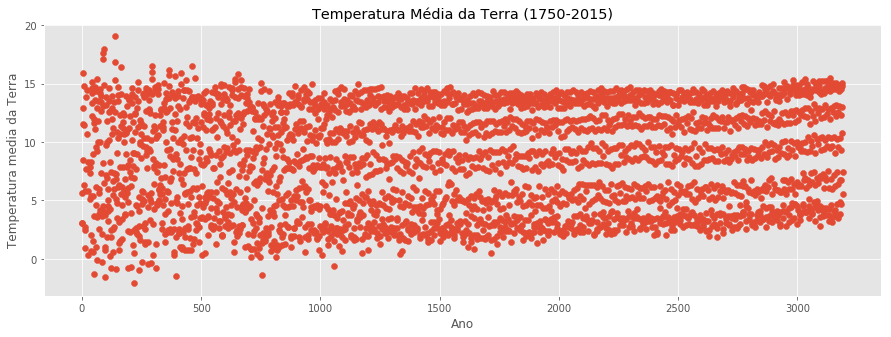

In [52]:
plt.figure(figsize = (15, 5))
plt.scatter(x = terra_file['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Temperatura Média da Terra (1750-2015)")
plt.xlabel("Ano")
plt.ylabel("Temperatura media da Terra")
plt.show()

In [53]:
print(type(terra_file['dt'][0]))

<class 'str'>


In [54]:
times = pd.DatetimeIndex(terra_file['dt'])

In [56]:
grouped = terra_file.groupby([times.year]).mean()

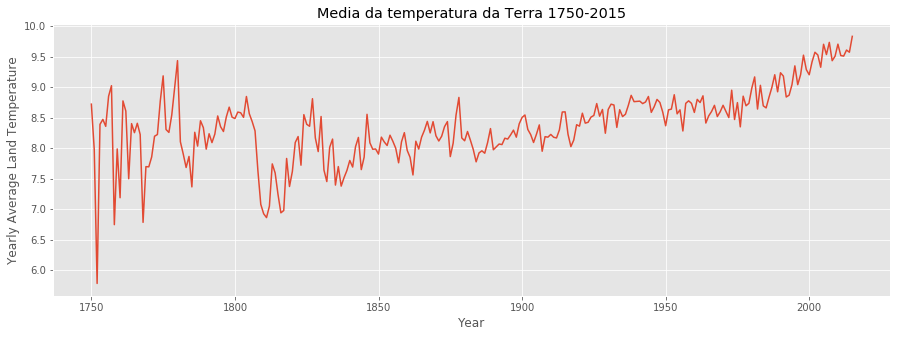

In [57]:


plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])


plt.title("Media da temperatura da Terra 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [62]:
times = pd.DatetimeIndex(terra_file['dt'])
grouped = terra_file.groupby([times.year]).mean()

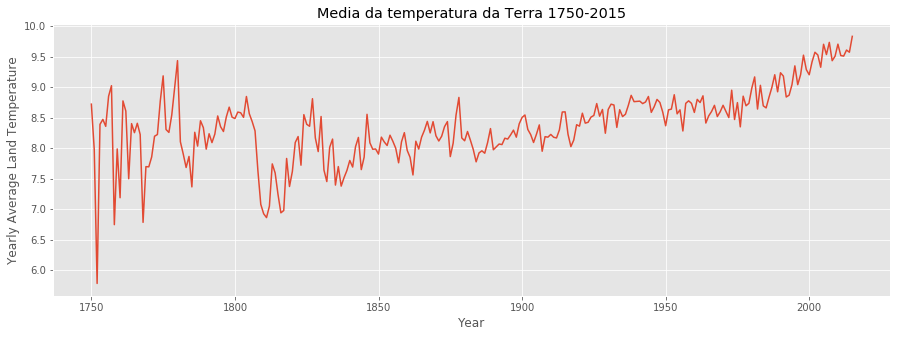

In [63]:
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])


plt.title("Media da temperatura da Terra 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [64]:
grouped.head()

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [65]:
terra_file[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [67]:
terra_file[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [70]:
terra_file['LandAverageTemperature'] = terra_file['LandAverageTemperature'].fillna(method='ffill')

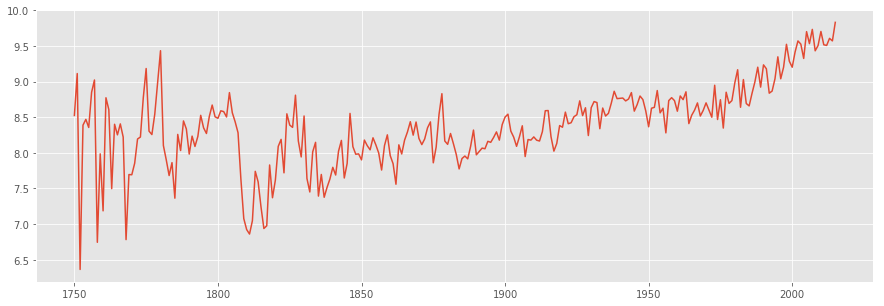

In [71]:

grouped = df.groupby([times.year]).mean()


plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression as LinReg

In [73]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [74]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.37668322753090727


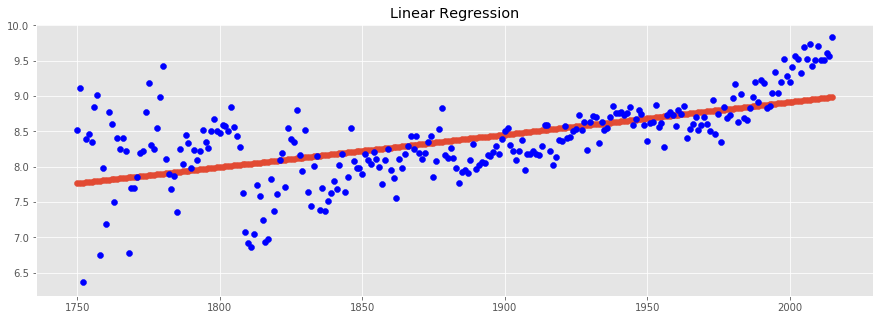

In [75]:
plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")

In [76]:
reg.predict(2000)

array([8.91609041])